# 전처리

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#중복-데이터-확인하기" data-toc-modified-id="중복-데이터-확인하기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>중복 데이터 확인하기</a></span></li><li><span><a href="#결측값-처리" data-toc-modified-id="결측값-처리-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>결측값 처리</a></span></li><li><span><a href="#address-컬럼" data-toc-modified-id="address-컬럼-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>address 컬럼</a></span></li><li><span><a href="#eval_cnt-컬럼" data-toc-modified-id="eval_cnt-컬럼-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>eval_cnt 컬럼</a></span><ul class="toc-item"><li><span><a href="#문자-제거" data-toc-modified-id="문자-제거-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>문자 제거</a></span></li><li><span><a href="#데이터-형식-변경" data-toc-modified-id="데이터-형식-변경-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>데이터 형식 변경</a></span></li></ul></li><li><span><a href="#review_cnt-컬럼" data-toc-modified-id="review_cnt-컬럼-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>review_cnt 컬럼</a></span><ul class="toc-item"><li><span><a href="#'리뷰'-삭제" data-toc-modified-id="'리뷰'-삭제-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>'리뷰' 삭제</a></span></li><li><span><a href="#데이터-타입-int로-바꿔주기" data-toc-modified-id="데이터-타입-int로-바꿔주기-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>데이터 타입 int로 바꿔주기</a></span></li></ul></li><li><span><a href="#이상값-처리" data-toc-modified-id="이상값-처리-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>이상값 처리</a></span><ul class="toc-item"><li><span><a href="#eval_cnt" data-toc-modified-id="eval_cnt-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>eval_cnt</a></span></li><li><span><a href="#review_cnt" data-toc-modified-id="review_cnt-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>review_cnt</a></span></li></ul></li><li><span><a href="#지리정보-추가하기" data-toc-modified-id="지리정보-추가하기-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>지리정보 추가하기</a></span><ul class="toc-item"><li><span><a href="#lat,-lng-컬럼-추가" data-toc-modified-id="lat,-lng-컬럼-추가-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>lat, lng 컬럼 추가</a></span></li><li><span><a href="#distance-컬럼-추가" data-toc-modified-id="distance-컬럼-추가-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>distance 컬럼 추가</a></span></li></ul></li><li><span><a href="#저장하기" data-toc-modified-id="저장하기-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>저장하기</a></span></li></ul></li></ul></div>

In [87]:
# import os
# import random #데이터 샘플링
# from collections import Counter # count 용도

import numpy as np
import pandas as pd

# from geopy import distance # 거리 계산
# import geopy.distance
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

# 한글, 마이너스 깨짐 방지
from matplotlib import rc, font_manager, rcParams
font=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font)
rcParams['axes.unicode_minus'] = False

# import folium # 지도 관련 시각화
# from folium.plugins import MarkerCluster #지도 관련 시각화

## 데이터 불러오기

In [37]:
df = pd.read_csv('./source/restaurant_raw(mk).csv')
df.head()

,name,category,address,score,eval_cnt,review_cnt
0,아리차이 신림점,중화요리,(지번) 신림동 1430-11,3.8,64건,리뷰 45
1,디자이너리카페,카페,(지번) 신림동 1465-12,3.6,33건,리뷰 184
2,원조민속순대타운,순대,(지번) 신림동 1640-31,3.3,30건,리뷰 175
3,월화고기 보라매직영점,"육류,고기",(지번) 봉천동 732-3,4.2,103건,리뷰 215
4,막불감동 신림본점,냉면,(지번) 신림동 1433-60,3.7,41건,리뷰 97


In [38]:
df.shape

(510, 6)

## 데이터 전처리

+ 결측값 확인하기
+ 불필요한 문자 지우기
+ 숫자 데이터는 숫자 형식으로 바꿔주기
+ 두 데이터 합치기

### 중복 데이터 확인하기

In [39]:
df['name'].value_counts()

마뇨떡볶이            2
서울갈비 신림점         2
서울집 신림직영점        2
만성찬팅             2
월화고기 보라매직영점      2
                ..
BHC치킨 신림역점       1
길동우동집            1
모자원민물장어추어탕       1
홍콩반점0410 신림역점    1
서울뼛국             1
Name: name, Length: 495, dtype: int64

In [40]:
df[df['name']=='월화고기 보라매직영점']

,name,category,address,score,eval_cnt,review_cnt
3,월화고기 보라매직영점,"육류,고기",(지번) 봉천동 732-3,4.2,103건,리뷰 215
18,월화고기 보라매직영점,"육류,고기",(지번) 봉천동 732-3,4.2,103건,리뷰 215


In [41]:
df[df['name']=='마뇨떡볶이']

,name,category,address,score,eval_cnt,review_cnt
13,마뇨떡볶이,떡볶이,(지번) 신림동 1638-1,4.1,46건,리뷰 100
28,마뇨떡볶이,떡볶이,(지번) 신림동 1638-1,4.1,46건,리뷰 100


In [42]:
df[df['name']=='만성찬팅']

,name,category,address,score,eval_cnt,review_cnt
8,만성찬팅,양꼬치,(지번) 신림동 75-42,3.3,60건,리뷰 153
23,만성찬팅,양꼬치,(지번) 신림동 75-42,3.3,60건,리뷰 153


In [43]:
# 중복값 제거
df.drop_duplicates('name', inplace=True)

In [44]:
df.shape

(495, 6)

### 결측값 처리

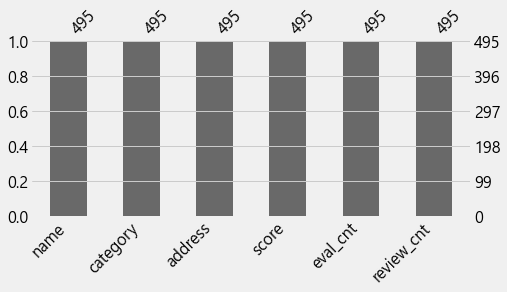

In [45]:
import missingno as msno
msno.bar(df, figsize=(7, 3))
plt.show()

+ 결측값 없음!

### address 컬럼

+ 앞부분에 '(지번)'이 불필요하게 들어가있다. 이를 삭제해주자
+ 조건문을 이용해주자.

In [46]:
df.head()

,name,category,address,score,eval_cnt,review_cnt
0,아리차이 신림점,중화요리,(지번) 신림동 1430-11,3.8,64건,리뷰 45
1,디자이너리카페,카페,(지번) 신림동 1465-12,3.6,33건,리뷰 184
2,원조민속순대타운,순대,(지번) 신림동 1640-31,3.3,30건,리뷰 175
3,월화고기 보라매직영점,"육류,고기",(지번) 봉천동 732-3,4.2,103건,리뷰 215
4,막불감동 신림본점,냉면,(지번) 신림동 1433-60,3.7,41건,리뷰 97


In [47]:
for row in tqdm(df.index):
    if df.address[row][:5] == '(지번) ':
        df.address[row] = df.address[row][5:]

100%|██████████████████████████████████████████████████████████████████████████████| 495/495 [00:00<00:00, 1748.19it/s]


In [48]:
df

,name,category,address,score,eval_cnt,review_cnt
0,아리차이 신림점,중화요리,신림동 1430-11,3.8,64건,리뷰 45
1,디자이너리카페,카페,신림동 1465-12,3.6,33건,리뷰 184
2,원조민속순대타운,순대,신림동 1640-31,3.3,30건,리뷰 175
3,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103건,리뷰 215
4,막불감동 신림본점,냉면,신림동 1433-60,3.7,41건,리뷰 97
...,...,...,...,...,...,...
505,빽다방 신림역2호점,커피전문점,신림동 1641-12,3.8,5건,리뷰 3
506,궁중 삼계탕,삼계탕,신대방동 395-66,3.2,6건,리뷰 5
507,본죽 신림역점,죽,신림동 1637-3,2.6,9건,리뷰 3
508,고고즉석떡볶이 신림역점,분식,신림동 1424-9,4.5,4건,리뷰 13


### eval_cnt 컬럼

+ 숫자가 아닌 다른 문자를 삭제
+ 컬럼을 int 형식으로 변경해주자.

#### 문자 제거

+ 해당 컬럼의 모든 레코드가 '건'이라는 글자로 끝나는지 확인.

In [50]:
df.eval_cnt.apply(lambda x: str(x)[-1]).value_counts()

건    495
Name: eval_cnt, dtype: int64

+ eval_cnt의 모든 레코드에 대해 '건'을 삭제해주자.

In [54]:
df['eval_cnt'] = df['eval_cnt'].apply(lambda x: str(x)[:-1])
df.head()

,name,category,address,score,eval_cnt,review_cnt
0,아리차이 신림점,중화요리,신림동 1430-11,3.8,64,리뷰 45
1,디자이너리카페,카페,신림동 1465-12,3.6,33,리뷰 184
2,원조민속순대타운,순대,신림동 1640-31,3.3,30,리뷰 175
3,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,리뷰 215
4,막불감동 신림본점,냉면,신림동 1433-60,3.7,41,리뷰 97


#### 데이터 형식 변경

+ object to int32

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 509
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        495 non-null    object 
 1   category    495 non-null    object 
 2   address     495 non-null    object 
 3   score       495 non-null    float64
 4   eval_cnt    495 non-null    object 
 5   review_cnt  495 non-null    object 
dtypes: float64(1), object(5)
memory usage: 43.2+ KB


In [62]:
df['eval_cnt'] = df['eval_cnt'].astype(int)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 509
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        495 non-null    object 
 1   category    495 non-null    object 
 2   address     495 non-null    object 
 3   score       495 non-null    float64
 4   eval_cnt    495 non-null    int32  
 5   review_cnt  495 non-null    object 
dtypes: float64(1), int32(1), object(4)
memory usage: 41.3+ KB


### review_cnt 컬럼

+ '리뷰' 문자 삭제
+ int로 데이터 타입 변경

#### '리뷰' 삭제

In [64]:
df

,name,category,address,score,eval_cnt,review_cnt
0,아리차이 신림점,중화요리,신림동 1430-11,3.8,64,리뷰 45
1,디자이너리카페,카페,신림동 1465-12,3.6,33,리뷰 184
2,원조민속순대타운,순대,신림동 1640-31,3.3,30,리뷰 175
3,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,리뷰 215
4,막불감동 신림본점,냉면,신림동 1433-60,3.7,41,리뷰 97
...,...,...,...,...,...,...
505,빽다방 신림역2호점,커피전문점,신림동 1641-12,3.8,5,리뷰 3
506,궁중 삼계탕,삼계탕,신대방동 395-66,3.2,6,리뷰 5
507,본죽 신림역점,죽,신림동 1637-3,2.6,9,리뷰 3
508,고고즉석떡볶이 신림역점,분식,신림동 1424-9,4.5,4,리뷰 13


In [66]:
df['review_cnt'].apply(lambda x: str(x)[:3]).value_counts()

리뷰     495
Name: review_cnt, dtype: int64

In [69]:
df['review_cnt'] = df['review_cnt'].apply(lambda x: str(x)[3:])

In [70]:
df.head()

,name,category,address,score,eval_cnt,review_cnt
0,아리차이 신림점,중화요리,신림동 1430-11,3.8,64,45
1,디자이너리카페,카페,신림동 1465-12,3.6,33,184
2,원조민속순대타운,순대,신림동 1640-31,3.3,30,175
3,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215
4,막불감동 신림본점,냉면,신림동 1433-60,3.7,41,97


#### 데이터 타입 int로 바꿔주기

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 509
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        495 non-null    object 
 1   category    495 non-null    object 
 2   address     495 non-null    object 
 3   score       495 non-null    float64
 4   eval_cnt    495 non-null    int32  
 5   review_cnt  495 non-null    object 
dtypes: float64(1), int32(1), object(4)
memory usage: 41.3+ KB


In [73]:
df['review_cnt'] = df['review_cnt'].astype(int)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 509
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        495 non-null    object 
 1   category    495 non-null    object 
 2   address     495 non-null    object 
 3   score       495 non-null    float64
 4   eval_cnt    495 non-null    int32  
 5   review_cnt  495 non-null    int32  
dtypes: float64(1), int32(2), object(3)
memory usage: 39.4+ KB


### 이상값 처리

+ eval_cnt 컬럼과 review_cnt 컬럼의 이상치를 확인하고 처리해주자

#### eval_cnt

In [76]:
df['eval_cnt'].value_counts().sort_index()

0      21
1      29
2      34
3      50
4      38
5      42
6      31
7      26
8      26
9      20
10     23
11     15
12     21
13     12
14      9
15     15
16     11
17      4
18      8
19      1
20      5
21      1
22      3
23      5
24      6
25      2
26      3
27      2
28      4
29      2
30      3
32      2
33      2
37      2
41      1
46      2
47      1
48      1
49      2
53      2
54      1
56      1
60      2
64      1
78      1
103     1
118     1
Name: eval_cnt, dtype: int64

#### review_cnt

In [82]:
df['review_cnt'].value_counts().sort_index()

0       6
1       4
2      17
3      17
4      16
       ..
219     1
249     1
290     1
308     1
580     1
Name: review_cnt, Length: 120, dtype: int64

### 지리정보 추가하기

+ 구글맵을 이용해서 주소를 기반으로 위도, 경도를 추가해주자
+ 신림역과의 거리 또한 추가.

#### lat, lng 컬럼 추가

In [125]:
import googlemaps
gmap_key = '********'
gmaps = googlemaps.Client(key=gmap_key)

In [127]:
# error
error_num = 0

# 구글맵API를 활용하여 각 카페의 주소에 해당하는 지리 정보를 얻어오기
for row in tqdm(df.index):
    try:
        geo = gmaps.geocode(str(df.loc[row, 'address']))
        df.loc[row, 'lat'] = geo[0].get('geometry')['location']['lat']
        df.loc[row, 'lng'] = geo[0].get('geometry')['location']['lng']
    except:
        df.loc[row, 'lat'] = np.nan
        df.loc[row, 'lng'] = np.nan
        error_num += 1

print(error_num)
df.head()

100%|████████████████████████████████████████████████████████████████████████████████| 495/495 [02:36<00:00,  3.16it/s]

0


,name,category,address,score,eval_cnt,review_cnt,lat,lng
0,아리차이 신림점,중화요리,신림동 1430-11,3.8,64,45,37.487588,126.928260
1,디자이너리카페,카페,신림동 1465-12,3.6,33,184,37.485008,126.924088
2,원조민속순대타운,순대,신림동 1640-31,3.3,30,175,37.483252,126.928758
3,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289
4,막불감동 신림본점,냉면,신림동 1433-60,3.7,41,97,37.484256,126.928156


In [132]:
print(df.lat.isnull().sum())
print(df.lng.isnull().sum())

0
0


#### distance 컬럼 추가

In [133]:
from haversine import haversine

In [137]:
sillim = (37.48427269489072, 126.92965336425706)

for index in tqdm(df.index):
    df.loc[index, 'distance'] = haversine(sillim, (df.loc[index, 'lat'], df.loc[index, 'lng']), unit='m')

df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 495/495 [00:00<00:00, 2210.65it/s]


,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance
0,아리차이 신림점,중화요리,신림동 1430-11,3.8,64,45,37.487588,126.928260,388.576625
1,디자이너리카페,카페,신림동 1465-12,3.6,33,184,37.485008,126.924088,497.792949
2,원조민속순대타운,순대,신림동 1640-31,3.3,30,175,37.483252,126.928758,138.279774
3,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687
4,막불감동 신림본점,냉면,신림동 1433-60,3.7,41,97,37.484256,126.928156,132.134471


### 저장하기

In [138]:
df.head()

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance
0,아리차이 신림점,중화요리,신림동 1430-11,3.8,64,45,37.487588,126.928260,388.576625
1,디자이너리카페,카페,신림동 1465-12,3.6,33,184,37.485008,126.924088,497.792949
2,원조민속순대타운,순대,신림동 1640-31,3.3,30,175,37.483252,126.928758,138.279774
3,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687
4,막불감동 신림본점,냉면,신림동 1433-60,3.7,41,97,37.484256,126.928156,132.134471


In [139]:
df.tail()

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance
505,빽다방 신림역2호점,커피전문점,신림동 1641-12,3.8,5,3,37.482939,126.930123,153.981065
506,궁중 삼계탕,삼계탕,신대방동 395-66,3.2,6,5,37.491395,126.923403,965.021609
507,본죽 신림역점,죽,신림동 1637-3,2.6,9,3,37.481983,126.929644,254.593116
508,고고즉석떡볶이 신림역점,분식,신림동 1424-9,4.5,4,13,37.486187,126.929550,213.112908
509,장충영양족발,"족발,보쌈",신림동 10-627,5.0,7,11,37.484379,126.936287,585.475925


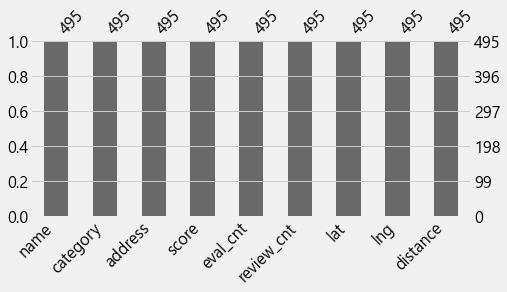

In [141]:
msno.bar(df, figsize=(7, 3))
plt.show()

In [142]:
df.to_csv('./source/restaurant_cleaning(mk).csv', index=False)

In [143]:
pd.read_csv('./source/restaurant_cleaning(mk).csv')

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance
0,아리차이 신림점,중화요리,신림동 1430-11,3.8,64,45,37.487588,126.928260,388.576625
1,디자이너리카페,카페,신림동 1465-12,3.6,33,184,37.485008,126.924088,497.792949
2,원조민속순대타운,순대,신림동 1640-31,3.3,30,175,37.483252,126.928758,138.279774
3,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687
4,막불감동 신림본점,냉면,신림동 1433-60,3.7,41,97,37.484256,126.928156,132.134471
...,...,...,...,...,...,...,...,...,...
490,빽다방 신림역2호점,커피전문점,신림동 1641-12,3.8,5,3,37.482939,126.930123,153.981065
491,궁중 삼계탕,삼계탕,신대방동 395-66,3.2,6,5,37.491395,126.923403,965.021609
492,본죽 신림역점,죽,신림동 1637-3,2.6,9,3,37.481983,126.929644,254.593116
493,고고즉석떡볶이 신림역점,분식,신림동 1424-9,4.5,4,13,37.486187,126.929550,213.112908
